In [69]:
import matplotlib.pyplot as plt
import networkx as nx
import cv2
import numpy as np
import math
import time
start_time = time.time()
img = cv2.imread('pauk.jpg')
imgb = cv2.imread('pauk.jpg', cv2.IMREAD_GRAYSCALE)

In [70]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) #LAB формат
imgb = cv2.imread('pauk.jpg', cv2.IMREAD_GRAYSCALE)
a = img1.shape[0] #ширина
b = img1.shape[1] #высота
print(a, b)
Ic = img1[round(a/2), round(b/2)]
ac = round(a/2)
bc = round(b/2)
print(Ic)

720 1080
[ 44 131 136]


In [71]:
lsc = cv2.ximgproc.createSuperpixelSLIC(img1, 101, region_size=30, ruler=0.1) #сегментация
lsc.iterate(200)
lsc.enforceLabelConnectivity(5)
Par = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]*lsc.getNumberOfSuperpixels(), dtype=float)
mask = lsc.getLabelContourMask() #маска сегментации
label = lsc.getLabels() #метки сегментации
nc = label[ac,bc] - 1 #центр
print(nc)

402


In [72]:
for i in range(0, a): #параметризация
    for j in range(0, b):
        n = label[i,j]
        Par[n-1][0] += 1 #количество пикселей
        Par[n-1][1] += img1[i,j][0]
        Par[n-1][2] += img1[i,j][1]
        Par[n-1][3] += img1[i,j][2]
        Par[n-1][4] = (Par[n-1][1]/Par[n-1][0])
        Par[n-1][5] = (Par[n-1][2]/Par[n-1][0])
        Par[n-1][6] = (Par[n-1][3]/Par[n-1][0])
        Par[n-1][7] += img[i,j][0]
        Par[n-1][8] += img[i,j][1]
        Par[n-1][9] += img[i,j][2]
        Par[n-1][10] = (Par[n-1][7]/Par[n-1][0])
        Par[n-1][11] = (Par[n-1][8]/Par[n-1][0])
        Par[n-1][12] = (Par[n-1][9]/Par[n-1][0])
print(Par)

[[1.04900e+03 2.67495e+05 1.34272e+05 ... 2.55000e+02 2.55000e+02
  0.00000e+00]
 [1.02900e+03 2.62395e+05 1.31712e+05 ... 2.55000e+02 2.55000e+02
  0.00000e+00]
 [9.97000e+02 2.54235e+05 1.27616e+05 ... 2.55000e+02 2.55000e+02
  0.00000e+00]
 ...
 [8.36000e+02 2.13180e+05 1.07008e+05 ... 2.55000e+02 2.55000e+02
  0.00000e+00]
 [8.35000e+02 2.12925e+05 1.06880e+05 ... 2.55000e+02 2.55000e+02
  0.00000e+00]
 [1.11500e+03 2.84325e+05 1.42720e+05 ... 2.55000e+02 2.55000e+02
  0.00000e+00]]


In [73]:
bord = np.array([[0, 0, 0, 0]] * len(Par))
stop = set()
for i in range(0, a): #параметризация
    for j in range(0, b):
        n = label[i,j]
        if n not in stop:
            bord[n-1][0] = i
            bord[n-1][1] = j
            stop.add(n)
        else:
            bord[n-1][0] = min([i, bord[n-1][0]])
            bord[n-1][1] = min([j, bord[n-1][1]])
        bord[n-1][2] = max([i-1, bord[n-1][2]])
        bord[n-1][3] = max([j-1, bord[n-1][3]])
print(bord)

[[  0  39  31  74]
 [  0  76  31 110]
 [  0 112  32 144]
 ...
 [689 435 718 464]
 [689 496 718 525]
 [  0   0  29  37]]


In [74]:
S = np.array([[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]*len(Par)) #соседи
for i in range(0, a):
    for j in range(0, b-1):
        n1 = label[i,j]
        n2 = label[i, j+1]
        if n1 != n2:
            if n2 not in S[n1]:
                k = 0
                while k != -1:
                    if S[n1][k] == -1:
                        S[n1][k] = n2
                        k = -1
                    elif k == 9:
                        k = -1
                    else:
                        k += 1
            if n1 not in S[n2]:
                k = 0
                while k != -1:
                    if S[n2][k] == -1:
                        S[n2][k] = n1
                        k = -1
                    elif k == 9:
                        k = -1
                    else:
                        k += 1
for j in range(0, b):
    for i in range(0, a-1):
        n1 = label[i,j]
        n2 = label[i+1, j]
        if n1 != n2:
            if n2 not in S[n1]:
                k = 0
                while k != -1:
                    if S[n1][k] == -1:
                        S[n1][k] = n2
                        k = -1
                    elif k == 9:
                        k = -1
                    else:
                        k += 1
            if n1 not in S[n2]:
                k = 0
                while k != -1:
                    if S[n2][k] == -1:
                        S[n2][k] = n1
                        k = -1
                    elif k == 9:
                        k = -1
                    else:
                        k += 1    
print(S)

[[  1  35  43 ...  -1  -1  -1]
 [  0   2  35 ...  -1  -1  -1]
 [  1   3  36 ...  -1  -1  -1]
 ...
 [791 815 848 ...  -1  -1  -1]
 [811 818 834 ...  -1  -1  -1]
 [819 812 835 ...  -1  -1  -1]]


In [75]:
def D(x1, x2, y1, y2):
    return ((x2 - x1)**2 + (y2 - y1)**2)

def gaus(q):
    A = 1
    o1 = 1
    o2 = 1
    o3 = 1
    res = A * math.exp(-(((q[4] - Par[nc][4])**2)/(2 * o1**2) + ((q[5] - Par[nc][5])**2)/(2 * o2**2) 
                           + ((q[6] - Par[nc][6])**2)/(2 * o3**2)))
    if res == 0:
        return 1
    else:
        return res

def Md(p, q):
    md = len(img1)*len(img1[0])
    for i in [0, 2]:
        for j in [1, 3]:
            for a in [0, 2]:
                for b in [1, 3]:
                    md = min(D(bord[p][i], bord[q][a], bord[p][j], bord[q][b]), md)
    return md

Os1 = 1000
def W1(n):
    w = 0
    for i in range(len(Par)):
        dis = Md(n, i-1)
        w += math.exp(-dis/(Os1))/gaus(Par[i-1])
    return w

def SC(p, n):
    s = 0
    K = W1(n)
    for i in range(len(Par)):
        d = ((p[4] - Par[i-1][4])**2 + (p[5] - Par[i-1][5])**2 + (p[6] - Par[i-1][6])**2)**0.5
        dis = Md(n, i-1)
        s += d * math.exp(-dis/(Os1))/(gaus(Par[i-1])*K)
    return s

N = len(Par)
def RG(p):
    return p[12] - p[11]

def BY(p):
    return p[10] - min(p[12], p[11])

def Dmax(p):
    m = 0
    for i in range(len(Par)):
        m = max(abs(RG(p) - RG(Par[i-1])), abs(BY(p) - BY(Par[i-1])), m)
    return m


def Srg(p):
    s = 0
    for i in range(len(Par)):
        s += abs(RG(p) - RG(Par[i-1]))
    return s/N

def Sby(p):
    s = 0
    for i in range(len(Par)):
        s += abs(BY(p) - BY(Par[i-1]))
    return s/N

def Scd(p):
    return (Srg(p) + Sby(p))/Dmax(p)

od2 = 5
od1 = 0.002

def W(p):
    w = 0
    for i in range(len(Par)):
        d = ((p[4] - Par[i-1][4])**2 + (p[5] - Par[i-1][5])**2 + (p[6] - Par[i-1][6])**2)**0.5
        w += math.exp(-d/(od2))
    return w

def SD(p, n):
    s = 0
    K = W(p)
    for i in range(len(Par)):
        d = ((p[4] - Par[i-1][4])**2 + (p[5] - Par[i-1][5])**2 + (p[6] - Par[i-1][6])**2)**0.5
        dis = Md(n, i-1)
        s += dis * math.exp(-d/(od1))/(K)
    return math.exp(-(s/(od1)))

p1 = 1
p2 = 1
for i in range(len(Par)):
    Par[i-1][13] = SC(Par[i-1], i-1)*(1 + p1 * Scd(Par[i-1]) + p2 * SD(Par[i-1], i-1))

#print(Par)
test = np.zeros(len(Par))
for i in range(len(Par)):
    test[i] = round(float(Par[i][13]), 2)
print(test)

[1.3660e+02 1.3660e+02 1.3660e+02 1.3660e+02 1.3660e+02 1.3660e+02
 1.3660e+02 1.3660e+02 1.3660e+02 2.1672e+02 2.2291e+02 2.2291e+02
 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02
 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02
 2.2291e+02 2.2291e+02 2.2291e+02 2.2224e+02 1.4820e+02 1.3765e+02
 1.3720e+02 1.3659e+02 1.3575e+02 1.3638e+02 1.3660e+02 1.3660e+02
 1.3660e+02 1.3660e+02 2.2291e+02 1.3660e+02 1.3660e+02 2.2291e+02
 1.3660e+02 1.3660e+02 1.3660e+02 2.2291e+02 2.2291e+02 2.2291e+02
 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02
 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02
 2.2249e+02 1.4160e+02 1.3386e+02 1.3385e+02 1.3385e+02 1.3660e+02
 2.0296e+02 2.2291e+02 1.3385e+02 2.2291e+02 1.3660e+02 1.3660e+02
 1.3660e+02 2.2291e+02 1.3660e+02 1.3660e+02 1.3660e+02 2.2291e+02
 2.2291e+02 2.2290e+02 1.3385e+02 1.3385e+02 1.3660e+02 1.3660e+02
 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02 2.2291e+02 2.2291

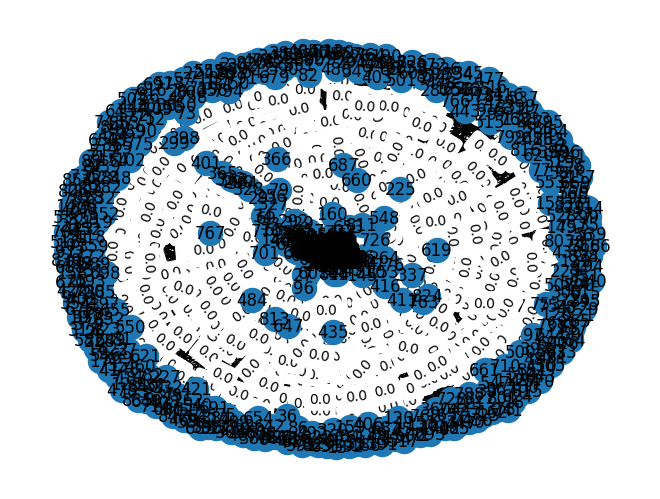

In [76]:
G = nx.Graph()  # создаём объект графа

# определяем список узлов
nodes = np.array([0]*len(test))

for i in range(0, len(nodes)):
    nodes[i] = i
G.add_nodes_from(nodes)
    
for i in range(0, len(S)):
    for j in range(0, 10):
        if S[i,j] != -1 and round((test[i-1] - test[S[i,j] - 1]), 2) >= 0.0:
            G.add_edge(i, S[i,j], weight=round((test[i-1] - test[S[i,j] - 1]), 2))

# рисуем граф и отображаем его
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

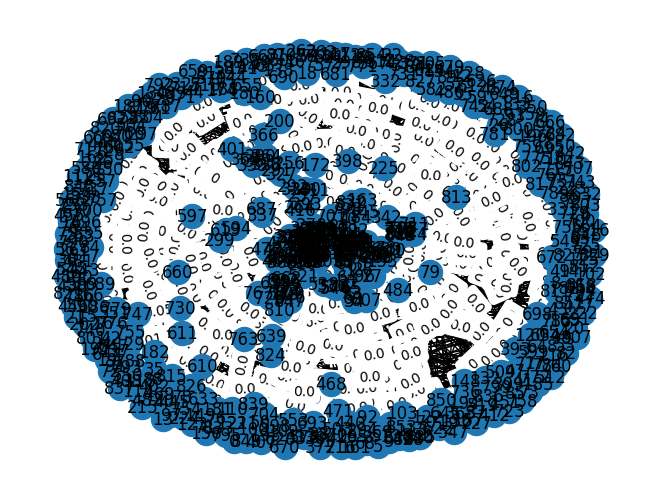

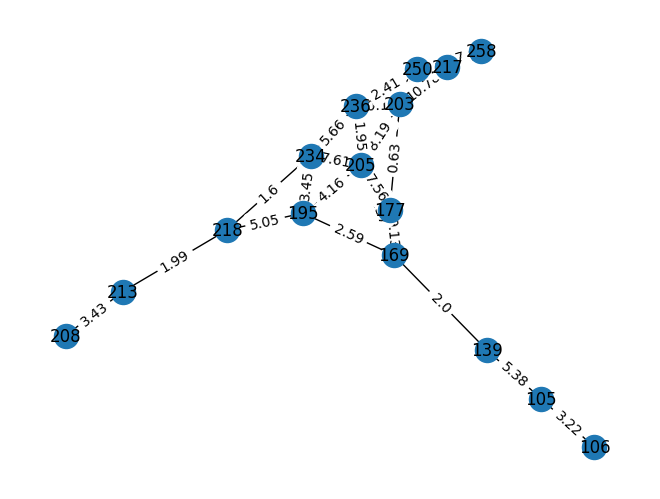

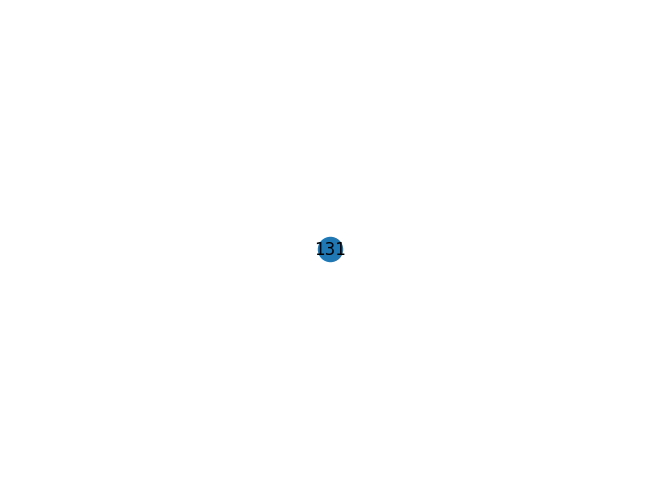

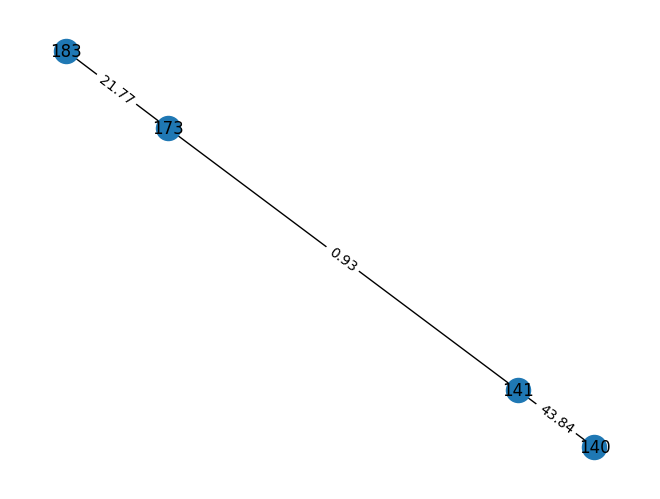

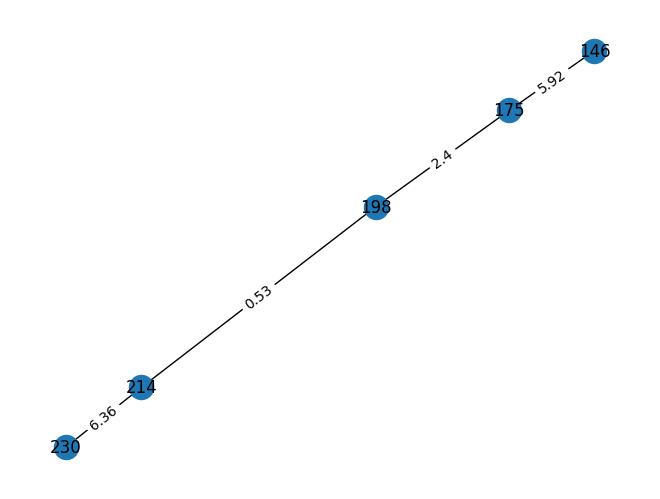

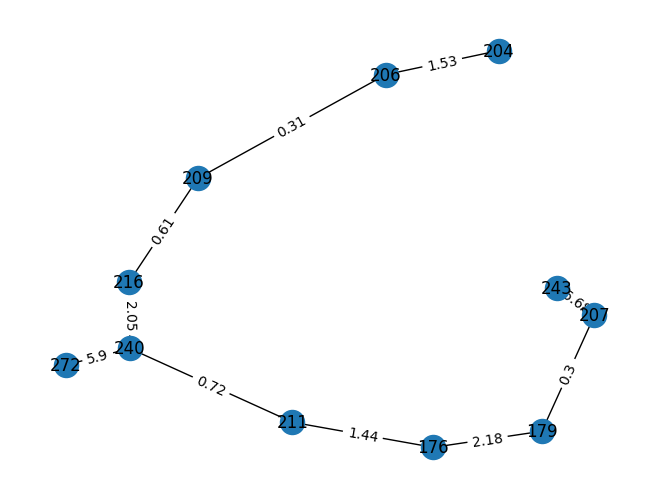

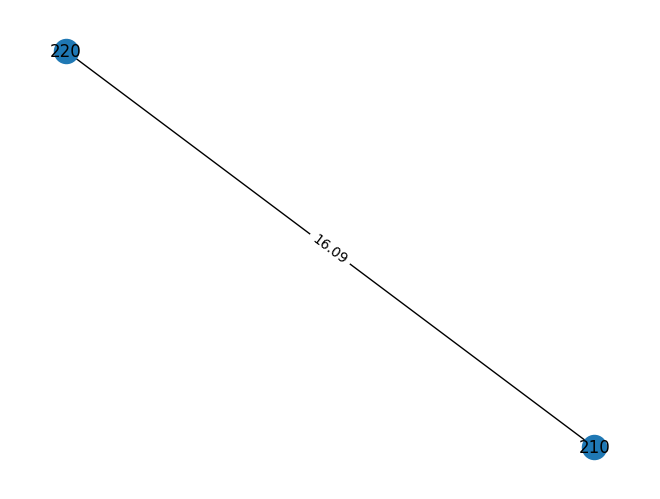

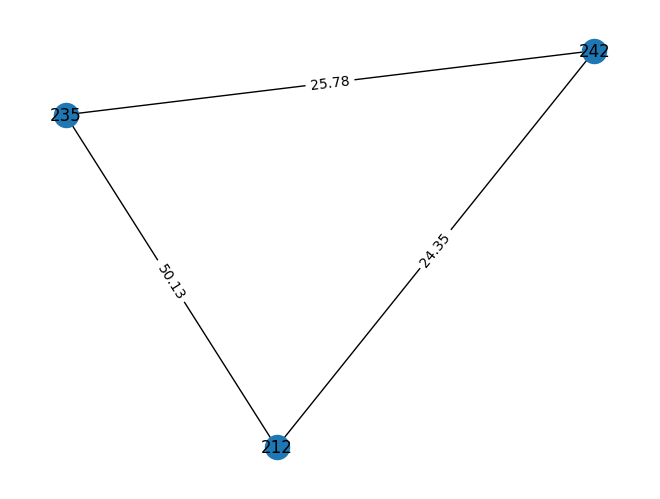

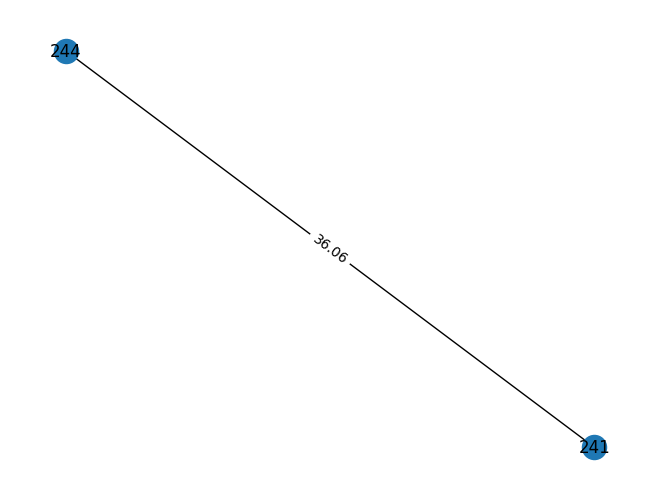

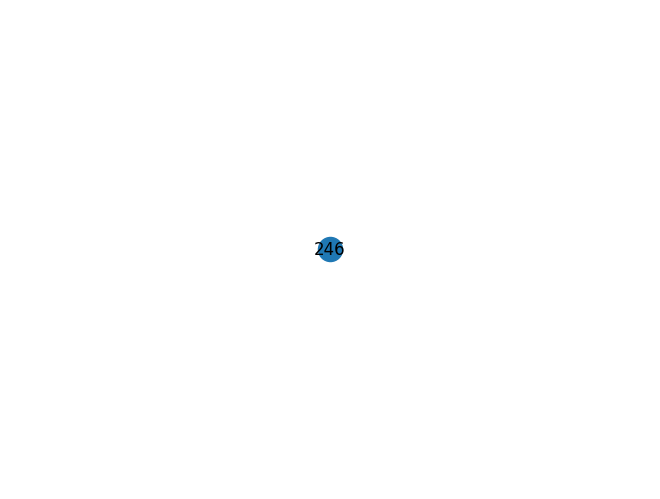

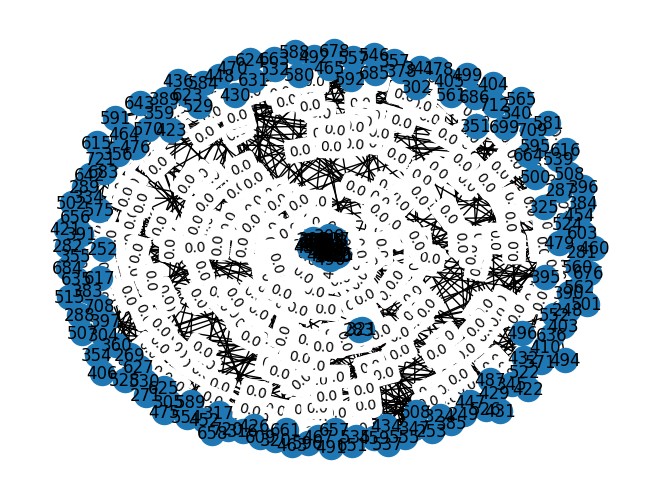

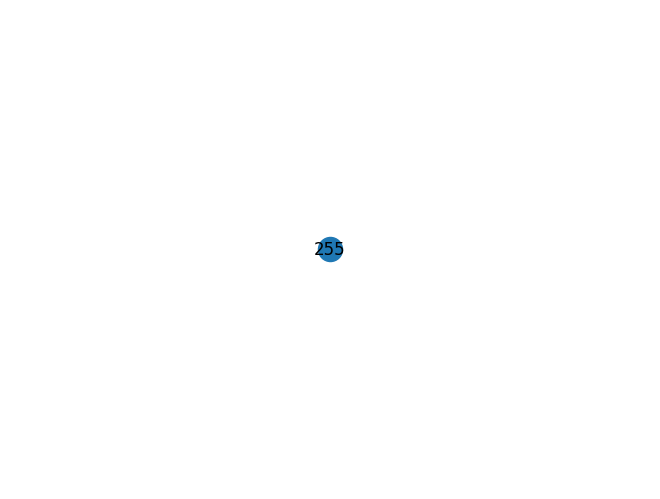

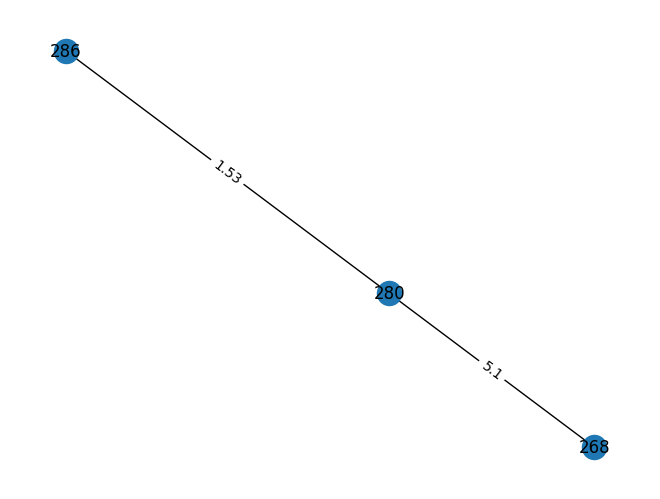

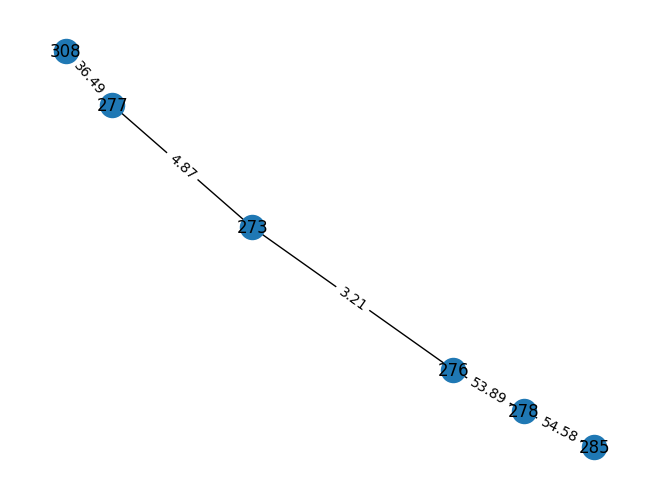

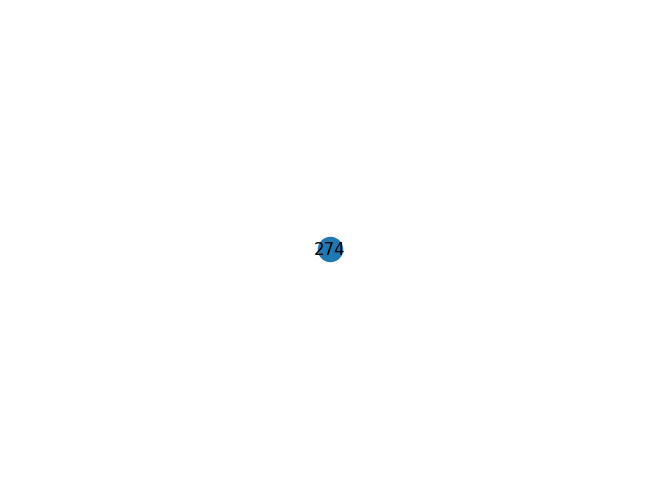

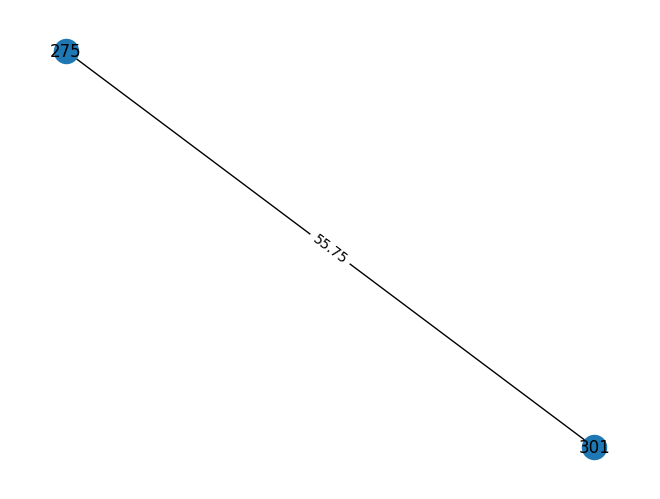

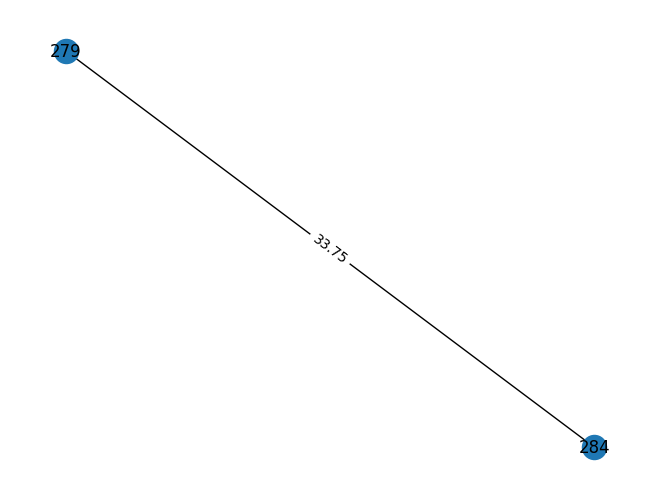

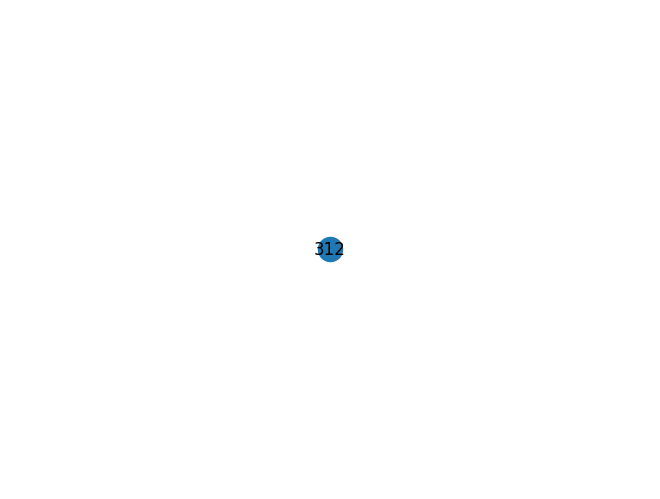

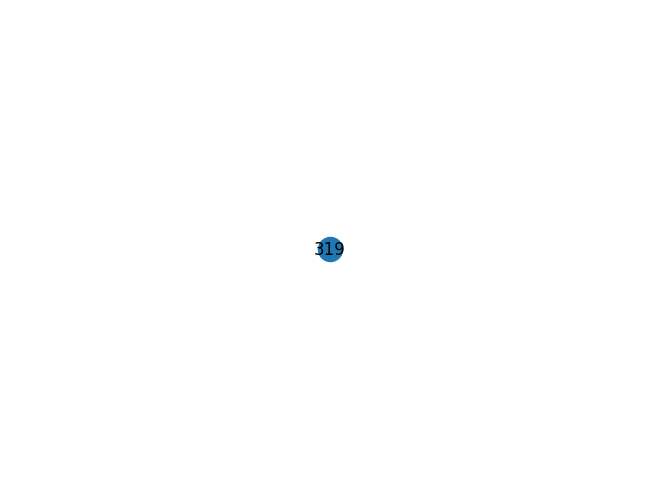

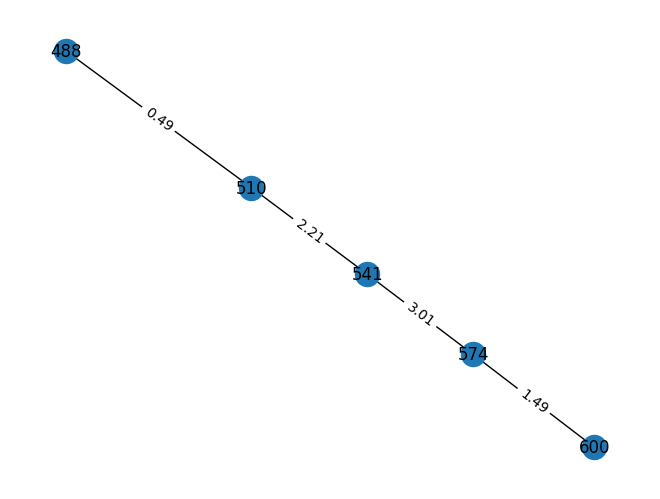

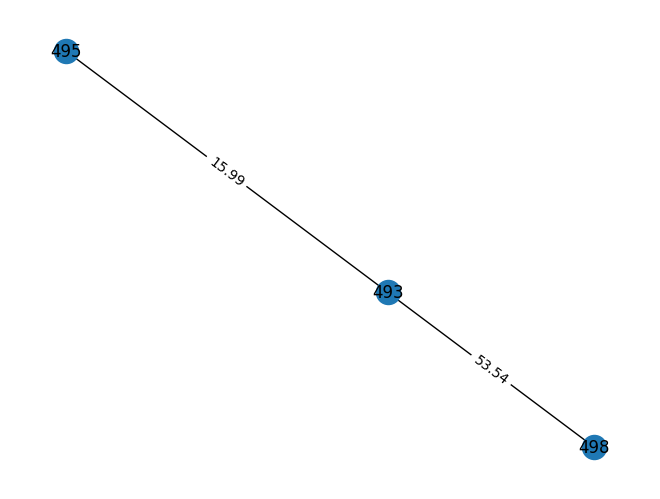

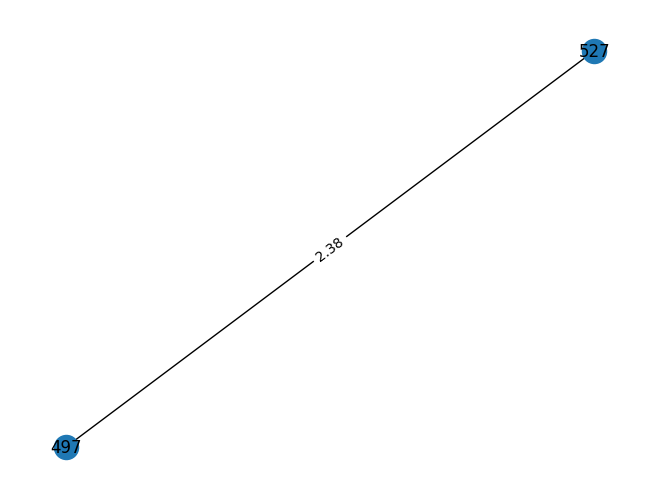

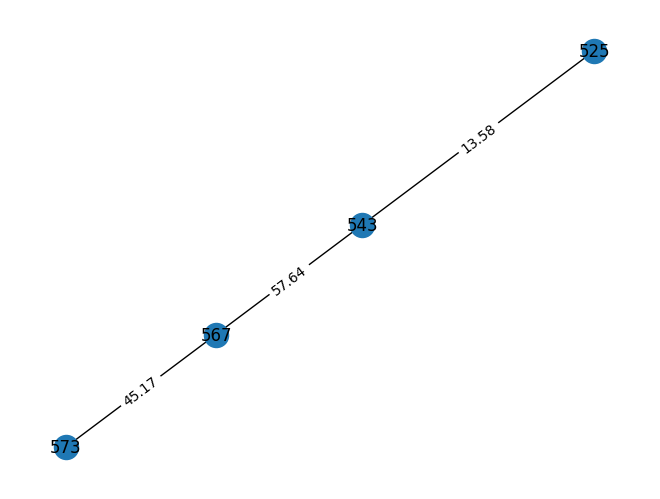

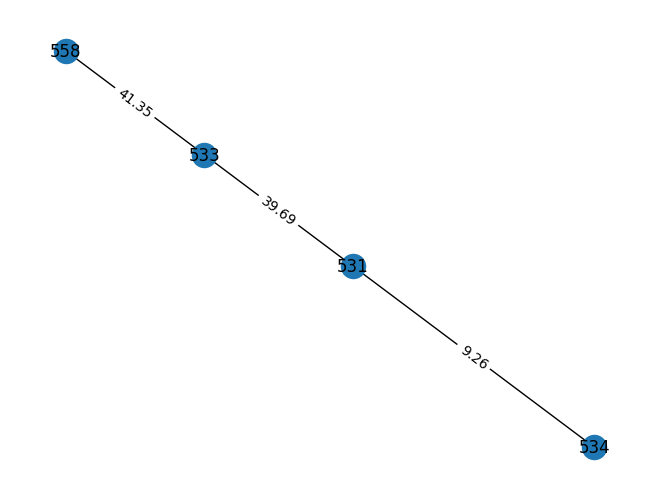

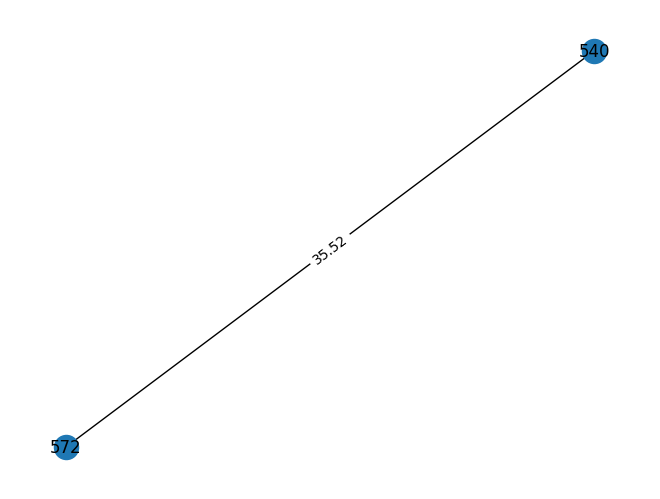

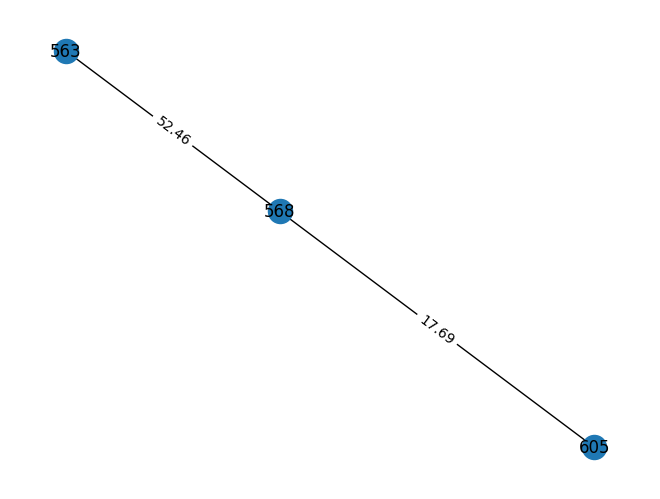

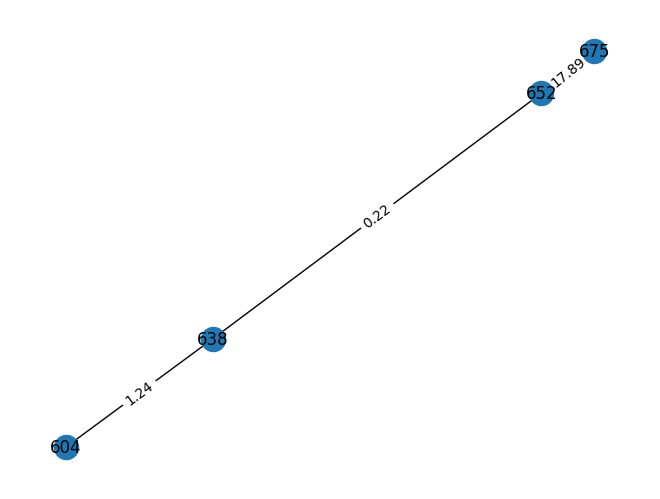

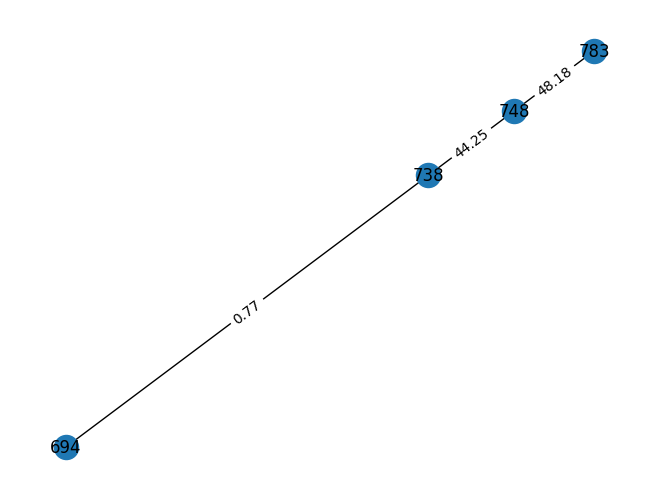

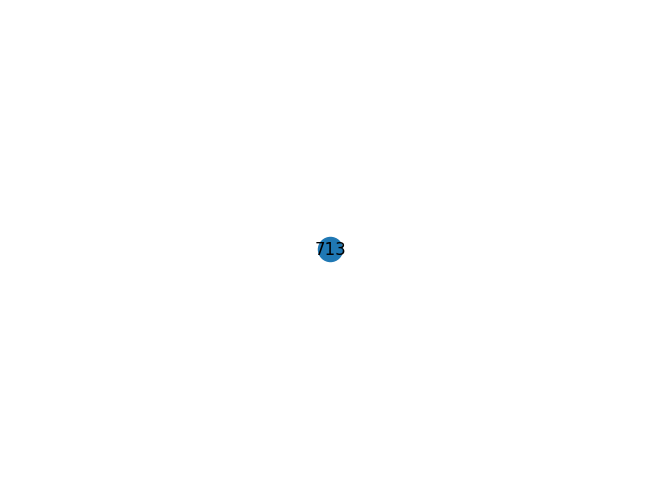

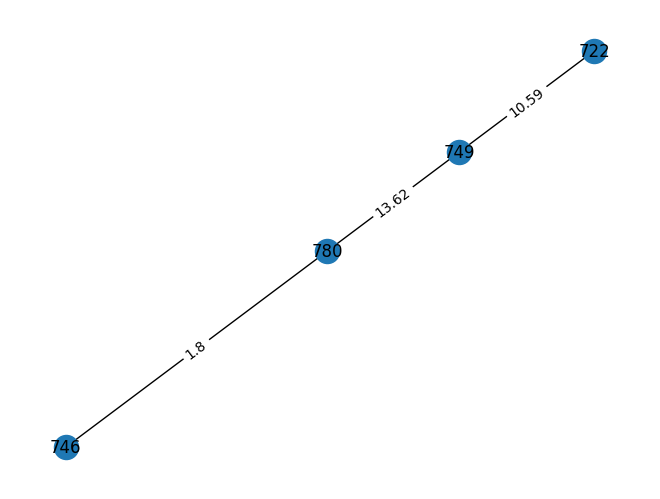

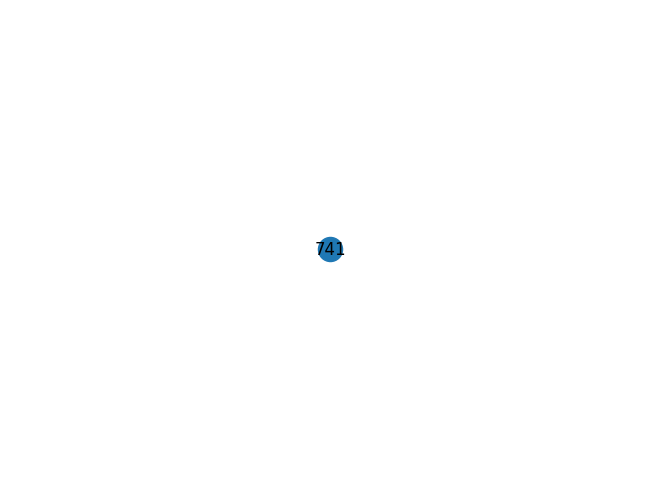

In [90]:
# Make a copy of the graph.
H = G.copy()
Ed = np.array([[0,0]])
nodes = list(H.nodes)
for i in nodes:
    h = list(H.adj[i].keys())
    #print(h)
    for j in range(0, len(h)):
        wt = H.edges[i, h[j]]["weight"]
        #print(wt)
        if wt > 60:
            z = h[j]
            Ed = np.append(Ed, [[i, z]], axis=0)
            H.remove_edge(i, z)
Ed = np.delete(Ed,(0), axis = 0)
subgraphs = [
        H.subgraph(c).copy() for c in nx.connected_components(H.to_undirected())
    ]
for subgraph in subgraphs:
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True)
    labels = nx.get_edge_attributes(subgraph, 'weight')
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels)
    plt.show()

In [91]:
Se = np.array([[-1] * (len(subgraphs) - 1)] * len(subgraphs)) #соседи
for i in range(0, len(subgraphs)):
    for j in range(0, len(subgraphs)):
        if i != j:
            #print(i,j)
            q = list(subgraphs[i].nodes)
            w = list(subgraphs[j].nodes)
            #print(q, w)
            for r in range(0, len(Ed)):
                if (Ed[r][0] in q and Ed[r][1] in w) or (Ed[r][0] in w and Ed[r][1] in q):
                    if j not in Se[i]:
                        k = 0
                        while k != -1:
                            if Se[i][k] == -1:
                                Se[i][k] = j
                                k = -1
                            elif k == 9:
                                k = -1
                            else:
                                k += 1
print(Se)
Pars = np.array([[0,0]]*len(subgraphs), dtype=float) #параметризация подграфов (мат ожидание и кол-во)
for i in range(0, len(subgraphs)):
    n = list(subgraphs[i].nodes)
    Pars[i][1] = len(n)
    for j in range(0, len(Par)):
        if j in n:
            Pars[i][0] += Par[j, 2]
    Pars[i][0] /= Pars[i][1] 
    print(Pars[i])

[[ 1  2  4  5  8 10 12 13 15 16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]
 [ 0  2  3  6 10 12 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]
 [ 0  1  3  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]
 [ 1  2  4  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]
 [ 0  2  3  6 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]
 [ 0  7  8  9 10 11 14 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]
 [ 1  3  4 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]
 [ 5 10 14 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]
 [ 0  5  9 13 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]
 [ 5  8 11 13 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]
 [ 0  1  4  5  6  7 11 12 13 14 -1 -1 -1 -1 -1 -1 

In [92]:
q = len(subgraphs)
w = 0
while q != w: #объединяем с ближайшими по мат ожиданию мелкие подграфы
    q = len(subgraphs)
    i = 0
    while i < len(subgraphs):
        n = list(subgraphs[i].nodes)
        m1 = Pars[i][0]
        if len(n) < 100:
            #print(i)
            t = Se[i][0]
            m2 = Pars[t][0]
            sr = np.array([abs(m2 - m1)], dtype=float)
            for j in range(1, len(Se[i])):
                if Se[i][j] != -1:
                    t = Se[i][j]
                    m2 = Pars[t][0]
                    sr = np.append(sr, abs(m1 - m2))
            z = 0
            for y in range(0, len(sr)):
                if sr[z] > sr[y]:
                    z = y
            t = Se[i][z]
            for p in range(0, len(Se)):
                for o in range(0, len(Se[0])):
                    if Se[p][o] == i:
                        if p != t:
                            Se[p][o] = t
                        else:
                            Se[p][o] = -1
                    if Se[p][o] > i:
                        Se[p][o] -= 1
            Se = np.delete(Se,(i), axis = 0)
            Pars[t][0] = (Pars[t][0] * Pars[t][1] + Pars[i][0]*Pars[i][1])/(Pars[t][1] + Pars[i][1])
            Pars[t][1] = (Pars[t][1] + Pars[i][1])
            Pars = np.delete(Pars, (i), axis = 0)
            subgraphs[t].add_nodes_from(n)
            sub = subgraphs[i]
            subgraphs.remove(sub)
            i = len(subgraphs) + 2
        i += 1
    w = len(subgraphs)
print(Pars)
Mid = 0
for i in range(0,len(Pars)-1):
    Mid += Pars[i][1]
Mid /= len(Pars)
print(Mid)

[[117067.35396825    630.        ]
 [115613.76          225.        ]]
315.0


In [93]:
col = 0
A = 256/len(subgraphs)
for sub in subgraphs:
    check = list(sub.nodes)
    for i in range(0, a):
        for j in range(0, b):
            n = label[i,j]
            if n in check:
                imgb[i, j] = col
    col += A
cv2.imwrite('test2L.jpg', imgb)

True

In [12]:
imgg = cv2.imread('roza_test.jpg', cv2.IMREAD_GRAYSCALE)
def T(I):
    S = 0
    N = len(I) * len(I[0])
    for i in range(len(I)):
        for j in range(len(I[0])):
            S += I[i,j]
    return 2 * S/N


def Pre(I):
    print(I[0,0], imgg[0,0])
    S = 0
    N = 0
    for i in range(len(I)):
        for j in range(len(I[0])):
            if I[i,j] != 0:
                N += 1
                if imgg[i,j] != 0:
                    S += 1
    print(S)
    print(N)
    return S/N

def Rec(I):
    print(I[0,0], imgg[0,0])
    S = 0
    N = 0
    for i in range(len(I)):
        for j in range(len(I[0])):
            if imgg[i,j] != 0:
                N += 1
                if I[i,j] != 0:
                    S += 1
    print(S)
    print(N)
    return S/N

pr = Pre(imgb)
rec = Rec(imgb)
print('Precision = ', pr)
print('Recall = ', rec)

B = 0.3
Fb = (1 + B**2) * rec * pr/(B**2 * pr + rec)
print('Fb = ', Fb)
print(T(imgb))


0 0
234919
435667
0 0
234919
246281
Precision =  0.5392168789465348
Recall =  0.9538657062461172
Fb =  0.5592915038823497
220.330853125


In [30]:
while len(subgraphs) > 2:
    M = np.array([[0, 0]]*len(Pars), dtype=float)
    for i in range(len(Pars)):
        s = 256
        for j in range(len(Pars)):
            if i != j and abs(Pars[i][0] - Pars[j][0]) < s:
                s = abs(Pars[i][0] - Pars[j][0])
                M[i][0] = s
                M[i][1] = j
    print(M)
    t = 0
    z = 0
    s = 256
    for i in range(len(M)):
        if M[i][0] < s:
            s = M[i][0]
            t = i
            z = int(M[i][1])
    print(t, z)
    #print(Pars)
    n = list(subgraphs[z].nodes)
    Pars[t][0] = (Pars[t][0] * Pars[t][1] + Pars[z][0]*Pars[z][1])/(Pars[t][1] + Pars[z][1])
    Pars[t][1] = (Pars[t][1] + Pars[z][1])
    #print(Pars)
    Pars = np.delete(Pars, (z), axis = 0)
    #print(Pars)
    subgraphs[t].add_nodes_from(n)
    sub = subgraphs[z]
    subgraphs.remove(sub)
    #print(Se)
    print(Pars)
    Mid = 0
    for i in range(0,len(Pars)):
        Mid += Pars[i][1]
    #Mid /= len(Pars)
    print(Mid)
print(len(subgraphs))

[[154.85924714   1.        ]
 [154.85924714   0.        ]
 [  0.           0.        ]]
2 0
[[106529.57692308    130.        ]
 [108145.81268012    347.        ]]
477.0
2
